In [68]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [2]:
data= load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data.target_names,data.target[2:6]

(array(['malignant', 'benign'], dtype='<U9'), array([0, 0, 0, 0]))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

In [6]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42).fit(X_train,y_train)
lm =LogisticRegression(random_state=42).fit(X_train,y_train)
rf = RandomForestClassifier(random_state=42,criterion='entropy',max_depth=5,n_estimators=17,max_features=5).fit(X_train,y_train)

bc =BaggingClassifier(base_estimator=dt,n_jobs=-1).fit(X_train,y_train)
Bc_ooE= BaggingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1,oob_score=True).fit(X_train,y_train)
bcr =BaggingClassifier(base_estimator=rf,n_jobs=-1).fit(X_train,y_train)

Vc=VotingClassifier(estimators=[dt,lm])
Classifiers= [ ('Decision Tree',dt),
               ('Log Regression',lm),
               ('Random Forest',rf),
               ('Bagging',bc),
               ('Bagging Forest',bcr),
               ('OoB',Bc_ooE),
               ('Voting',Vc)]

Vc=VotingClassifier(Classifiers[:-2]).fit(X_train,y_train)



lasso = Lasso(alpha=0.3).fit(X_train,y_train)
y_pred_la = lasso.predict(X_test)

In [7]:
Classifiers= [ ('Decision Tree',dt),
               ('Log Regression',lm),
               ('Random Forest',rf),
               ('Bagging',bc),
               ('Bagging Forest',bcr),
               ('OoB',Bc_ooE),
               ('Voting',Vc)]

In [8]:
for Classifier,model in Classifiers:
    model_pred=model.predict(X_test)
    print('{:s}: {:.8f}'.format(Classifier,accuracy_score(y_test,model_pred)))

Decision Tree: 0.97340426
Log Regression: 0.95744681
Random Forest: 0.96808511
Bagging: 0.94680851
Bagging Forest: 0.97340426
OoB: 0.95212766
Voting: 0.97340426


In [9]:
Bc_ooE.oob_score_

0.94750656167979

In [10]:
Vc=VotingClassifier(Classifiers).fit(X_train,y_train)

In [11]:
Classifiers= [('Decision Tree',dt),
               ('Log Regression',lm),
               ('Random Forest',rf),
             ('Voting Classifier',Vc)]

In [12]:
for Classifier,model in Classifiers:
    model_pred=model.predict(X_test)
    print('{:s}: {:.8f}'.format(Classifier,accuracy_score(y_test,model_pred)))

Decision Tree: 0.97340426
Log Regression: 0.95744681
Random Forest: 0.96808511
Voting Classifier: 0.97340426


In [14]:
ada=AdaBoostClassifier(base_estimator=dt).fit(X_train,y_train)

In [15]:
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [17]:
ada_roc_auc  =roc_auc_score(y_test,y_pred_proba)

In [20]:
accuracy_score(y_test,ada.predict(X_test))

0.9414893617021277

In [32]:
gbc=GradientBoostingClassifier(n_estimators=5).fit(X_train,y_train)

In [33]:
accuracy_score(y_test,gbc.predict(X_test))

0.9521276595744681

In [64]:
sgbr = GradientBoostingClassifier(max_depth=4, 
            subsample=0.85,
            max_features=0.5,
            n_estimators=100,                                
            random_state=2).fit(X_train,y_train)

In [65]:
accuracy_score(y_test,sgbr.predict(X_test))

0.9521276595744681

In [67]:
dt.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [84]:
#dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42).fit(X_train,y_train)
dt=DecisionTreeClassifier()
params_dt={'max_depth':[1,2,3,4,5,6,7],
          'min_samples_leaf': [0.01,0.02,0.04,0.08],
          'criterion':['entropy','gini'],
          'max_features':[0.2,0.4,0.6,0.8]}

In [95]:
grid_dt=GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy',cv=10,n_jobs=-1).fit(X_train,y_train)

In [96]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 0.8,
 'min_samples_leaf': 0.01}

In [106]:
dt=grid_dt.best_estimator_.fit(X_train,y_train)

In [107]:
accuracy_score(y_test,dt.predict(X_test))

0.9787234042553191

In [81]:
lm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [100]:
lm =LogisticRegression()
lm_params={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_lm=GridSearchCV(estimator=lm,param_grid=lm_params).fit(X_train,y_train)
grid_lm.best_params_

{'solver': 'newton-cg'}

In [105]:
lm =grid_lm.best_estimator_.fit(X_train,y_train)
accuracy_score(y_test,lm.predict(X_test))

0.9680851063829787

In [108]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 17,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [110]:
rf=RandomForestClassifier()
params_rf={'criterion': ['entropy','gini'],
          'max_depth':[1,2,3,4,5,6],
          'max_features':[1,2,3,4,5,6,7,8,9],
        'min_samples_leaf': [0.1,0.2,0.3,0.4,1]},
grid_rf=GridSearchCV(estimator=rf,param_grid=params_rf,cv=10,scoring='accuracy').fit(X_train,y_train)
rf=grid_rf.best_estimator_.fit(X_train,y_train)
accuracy_score(y_test,rf.predict(X_test))

0.9574468085106383

In [45]:
lasso.coef_

array([-0.        , -0.        , -0.        ,  0.00025427, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.00561035, -0.01806095,  0.00028739, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

Text(0, 0.5, 'Coefficients')

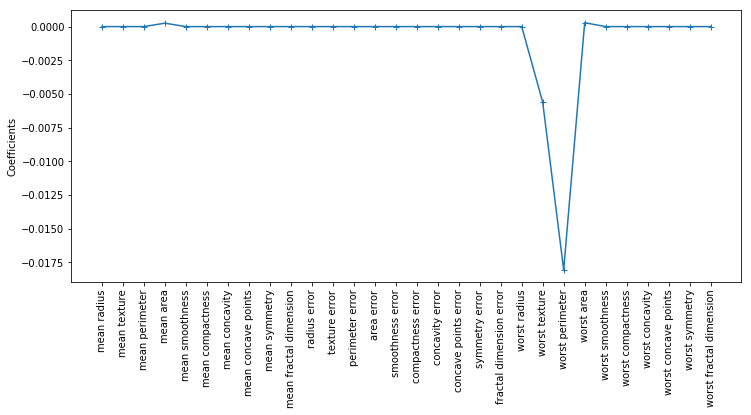

In [58]:
plt.figure(figsize=(12,5))
plt.plot(range(len(data.feature_names.tolist())), lasso.coef_,marker='+')
plt.xticks(range(len(data.feature_names.tolist())), data.feature_names, rotation=90)
plt.ylabel('Coefficients')

In [23]:
acc= list()
for x in range(20):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=x+1, random_state=42)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred_dt))
acc=pd.Series(acc,index=np.arange(1,21))

Text(0, 0.5, 'Accuracy')

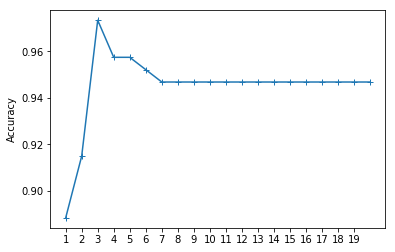

In [24]:
plt.plot(acc,marker='+')
plt.xticks(np.arange(1,20,1))
plt.ylabel('Accuracy')

In [37]:
import eli5
from eli5.sklearn import PermutationImportance

In [38]:
perm_rf =PermutationImportance(rf,random_state=56).fit(X_test,y_test)
perm_dt =PermutationImportance(dt,random_state=58).fit(X_test,y_test)
perm_lm =PermutationImportance(lm,random_state=11).fit(X_test,y_test)
eli5.show_weights(perm_rf, feature_names =data.feature_names)

Weight,Feature
0.0160 ± 0.0095,worst perimeter
0.0160 ± 0.0178,worst texture
0.0149 ± 0.0080,mean radius
0.0128 ± 0.0128,worst area
0.0117 ± 0.0183,worst concave points
0.0117 ± 0.0183,mean concave points
0.0106 ± 0.0150,worst concavity
0.0106 ± 0.0117,area error
0.0096 ± 0.0124,mean texture
0.0085 ± 0.0085,mean compactness


In [40]:
eli5.show_weights(perm_dt, feature_names =data.feature_names)


Weight,Feature
0.1457 ± 0.0159,worst radius
0.1426 ± 0.0043,worst concavity
0.1426 ± 0.0183,area error
0.0755 ± 0.0206,mean concave points
0.0691 ± 0.0350,worst perimeter
0.0128 ± 0.0159,mean texture
0.0021 ± 0.0052,worst texture
0 ± 0.0000,mean area
0 ± 0.0000,mean smoothness
0 ± 0.0000,mean compactness


In [41]:
eli5.show_weights(perm_lm, feature_names =data.feature_names)

Weight,Feature
0.4096 ± 0.0476,worst area
0.1638 ± 0.0406,worst perimeter
0.1330 ± 0.0398,area error
0.1330 ± 0.0398,worst texture
0.1032 ± 0.0173,mean perimeter
0.0957 ± 0.0398,mean radius
0.0915 ± 0.0389,mean area
0.0574 ± 0.0318,worst radius
0.0085 ± 0.0128,mean texture
0.0021 ± 0.0052,worst concavity


In [14]:
lasso.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
       -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.])

In [70]:
data.feature_names.tolist()

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']